## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





C:\Users\michele\AppData\Local\Temp\ipykernel_14936\1550895726.py:9: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  a=np.random.random_integers(0,1,n)


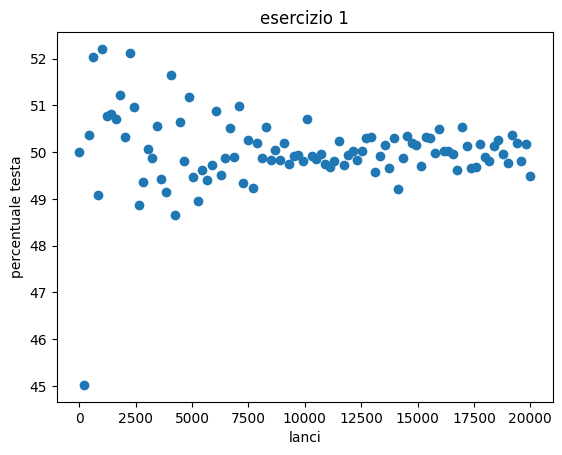

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


def funzione(n):

    a=np.random.random_integers(0,1,n)
    b=np.array(a[a==0])
    return len(b)/n*100


array=np.linspace(10,20000,100,dtype=int)
#print(array)

ls=[]
for i in range(100):
    
    ls.append(funzione(array[i]))

array2=(ls)

plt.scatter( array, array2 )

plt.xlabel('lanci')
plt.ylabel('percentuale testa')
plt.title('esercizio 1')
plt.show()


## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

In [103]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     714 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


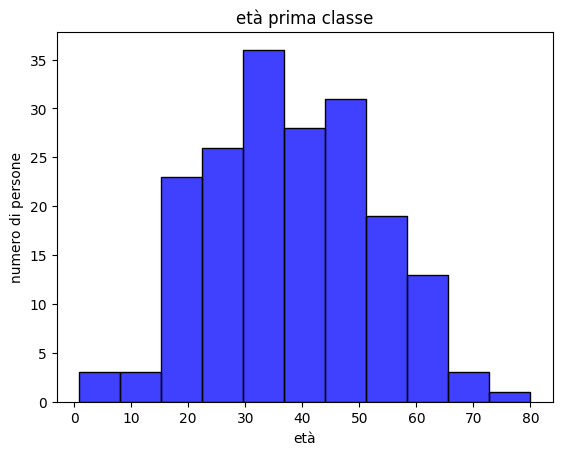

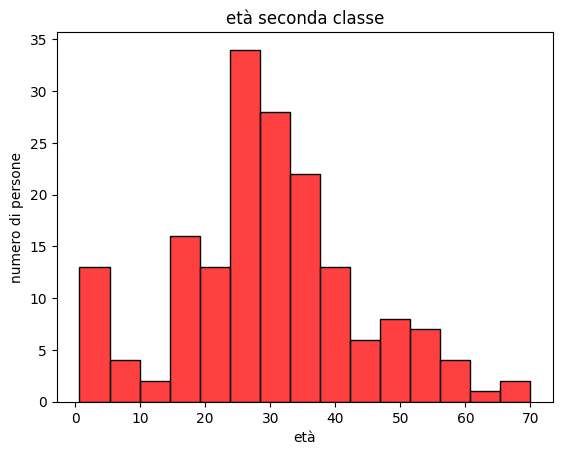

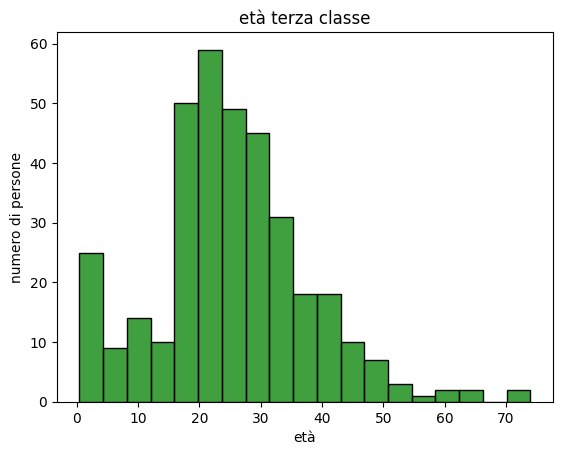

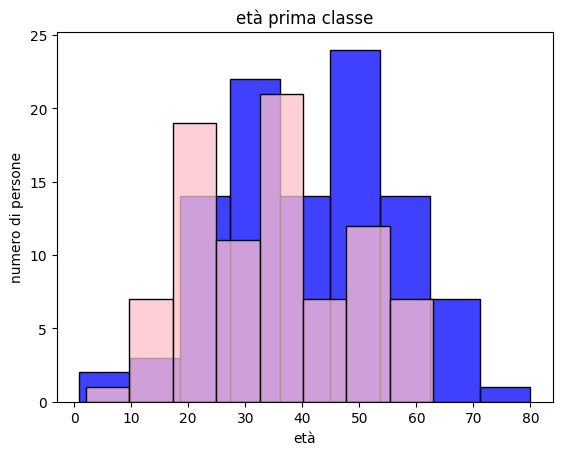

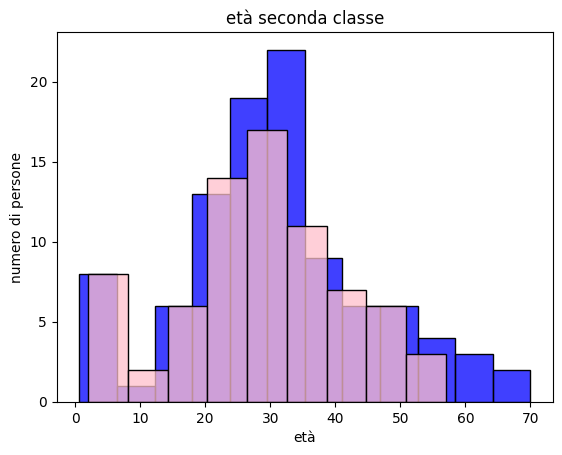

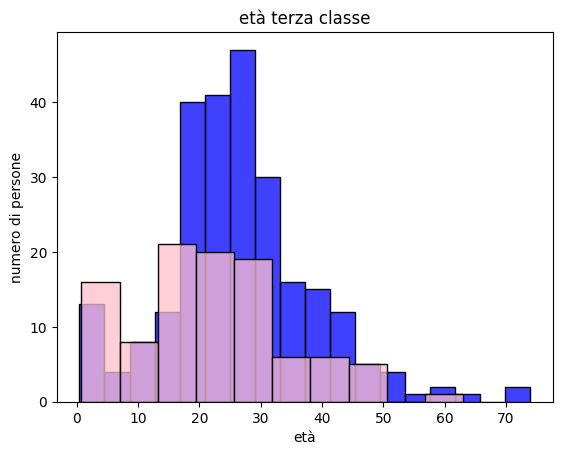

In [119]:
#df.info()
#il dataset ha 891 righe e 12 colonne, la colonna age ha 177 valori mancanti, cabin 687 e embarked 2
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df.dropna(subset= 'Age', axis= 0, inplace= True)
df.drop_duplicates(inplace=True)
#considerando il fatto che utilizzando drop_duplicates le righe rimangono uguali, da ciò si evince che non ci sono righe duplicate all'interno del data frame
df.info()
df.groupby(by= 'Pclass' )['Age'].mean()
plt.title('età prima classe')
plt.xlabel('età')
plt.ylabel('numero di persone')
a=df[df['Pclass']== 1]
b=df[df['Pclass']== 2]
c=df[df['Pclass']== 3]
sns.histplot(data= a, x= 'Age', color= 'blue' )
plt.show()

sns.histplot(data= b, x= 'Age', color = 'red' )
plt.xlabel('età')
plt.ylabel('numero di persone')
plt.title('età seconda classe')
plt.show()

sns.histplot(data= c, x= 'Age', color = 'green' )
plt.xlabel('età')
plt.ylabel('numero di persone')
plt.title('età terza classe')
plt.show()

sns.histplot(a[a['Sex'] == 'male'], x = 'Age', color= 'blue')
sns.histplot(a[a['Sex'] == 'female'], x = 'Age', color= 'pink')
plt.xlabel('età')
plt.ylabel('numero di persone')
plt.title('età prima classe')
plt.show()

sns.histplot(b[b['Sex'] == 'male'], x = 'Age', color= 'blue')
sns.histplot(b[b['Sex'] == 'female'], x = 'Age', color= 'pink')
plt.xlabel('età')
plt.ylabel('numero di persone')
plt.title('età seconda classe')
plt.show()

sns.histplot(c[c['Sex'] == 'male'], x = 'Age', color= 'blue')
sns.histplot(c[c['Sex'] == 'female'], x = 'Age', color= 'pink')
plt.xlabel('età')
plt.ylabel('numero di persone')
plt.title('età terza classe')
plt.show()








## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


species
setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64
            petal_length  petal_width
species                              
setosa             1.462        0.246
versicolor         4.260        1.326
virginica          5.552        2.026


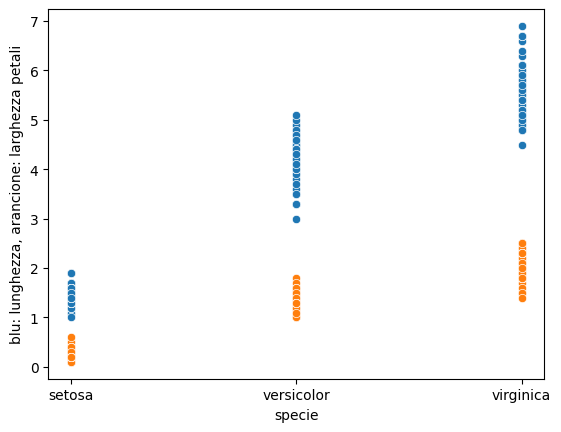

   sepal_length  sepal_width  petal_length  petal_width species  area_petali
0           5.1          3.5           1.4          0.2  setosa         0.28
1           4.9          3.0           1.4          0.2  setosa         0.28
2           4.7          3.2           1.3          0.2  setosa         0.26
3           4.6          3.1           1.5          0.2  setosa         0.30
4           5.0          3.6           1.4          0.2  setosa         0.28


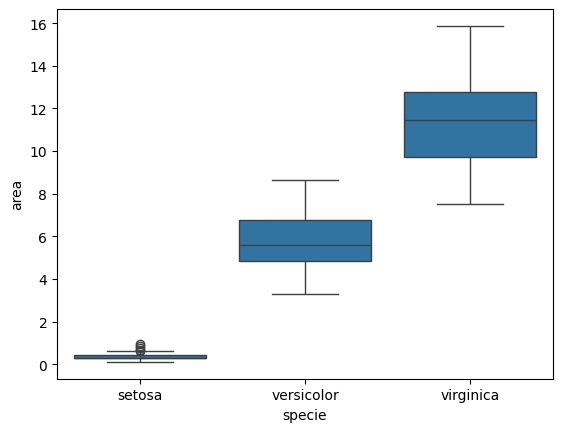

In [4]:
print(df.groupby('species')['species'].count())
print(df.groupby('species').agg({'petal_length' : 'mean', 'petal_width' : 'mean'}))
sns.scatterplot(data=df,x=df['species'], y=df['petal_length'])
sns.scatterplot(data=df,x=df['species'], y=df['petal_width'])
plt.xlabel("specie")
plt.ylabel('blu: lunghezza, arancione: larghezza petali')
plt.show()
df['area_petali']= (df['petal_length']*df['petal_width'])

print(df.head())
sns.boxplot(data= df, x=df['species'], y=df['area_petali'])
plt.xlabel('specie')
plt.ylabel('area')

plt.show()